###### This code is developed in collaboration between Facebook and Onstitute. It is for academic and personal use only. Commercial use is strictly prohibited withot the permission of the parties mentioned above

## Dataset Type

In [30]:
DATASET_TYPE = "downloaded" # Options are "toy" or "downloaded"


## EITHER: Generate the Dataset

In [31]:
import numpy as np

def generate_dataset():
  X = np.linspace(0, 2, 100)
  Y = 1.5 * X + np.random.randn(*X.shape) * 0.2 + 0.5
  return X, Y

if DATASET_TYPE == "toy":
  X, Y = generate_dataset()


## OR: Download Real Dataset (We downloaded from UCI Repository. You can use your dataset) 

In [32]:
import os
import requests
import zipfile
import pandas as pd

def download_dataset():
  if (not os.path.exists('Bike-Sharing-Dataset.zip')):
    url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip'
    r = requests.get(url)
    open('Bike-Sharing-Dataset.zip', 'wb').write(r.content)

  zf = zipfile.ZipFile('Bike-Sharing-Dataset.zip')
  # Load data from URL using pandas read_csv method
  bike_data_daily = pd.read_csv(zf.open('day.csv'))
  return bike_data_daily.atemp.to_numpy(), bike_data_daily.cnt.to_numpy()

if DATASET_TYPE == "downloaded":
  X, Y = download_dataset()


## Scale the Data

In [33]:
# Image processing and pixel values - min-max scaling
# knn-clustering or regression which use distance metrics - standardization
# SVM or logistic regression or Neural Network which use gradiant descent - standardization
# decision tree and random forest - not distance based, hence no scaling is needed

# Normalize the data - Convert to range [0, 1]
# Y = (Y - np.min(Y)) / (np.max(Y) - np.min(Y))
# Standardize the data - Convert to a normal distribution with mean 0 and standard deviation of 1
Y = (Y - np.mean(Y)) / np.std(Y)


## Visualize the full Dataset

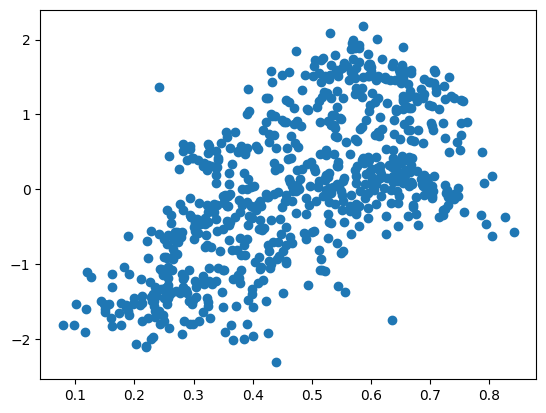

In [34]:
import matplotlib.pyplot as plt
plt.scatter(X, Y)


## Split the Dataset into Training and Test Set

In [35]:
from sklearn.model_selection import train_test_split
X_train_split, X_test_split, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


## Visualize the splits (Training and Test Data)

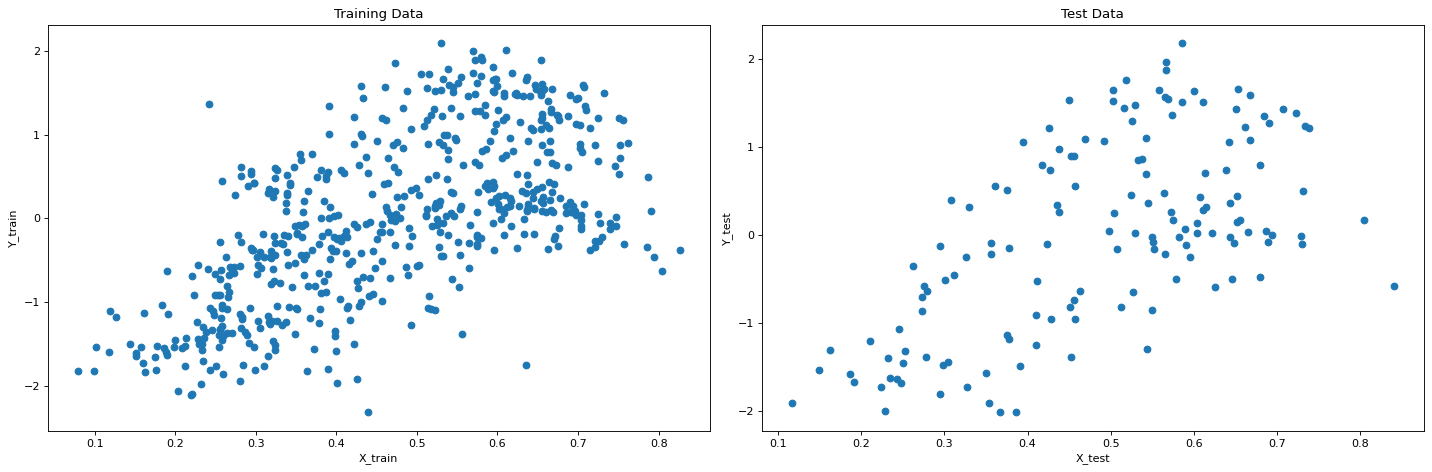

In [36]:
from matplotlib.pyplot import figure

figure(figsize=(18, 6), dpi=80)

plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.scatter(X_train_split, Y_train)
plt.title("Training Data")
plt.xlabel('X_train')
plt.ylabel('Y_train')

plt.subplot(1, 2, 2) # index 2
plt.scatter(X_test_split, Y_test)
plt.title("Test Data")
plt.xlabel('X_test')
plt.ylabel('Y_test')

plt.tight_layout()
plt.show()


## Create a 2D array for training and test data to make it compatible with scikit-learn (This is specific to scikit-learn because of the way it accepts input data)

In [37]:
X_train = X_train_split.reshape(-1, 1)
X_test = X_test_split.reshape(-1, 1)
X_train.shape, X_test.shape


((584, 1), (147, 1))

## Initialize Model

In [38]:
from sklearn.linear_model import SGDRegressor

# Update hyperparameters for the SGDRegressor function using paraemters defined in -
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html

regressor = SGDRegressor()


## Run Model Training

In [39]:
regressor.fit(X_train, Y_train)


SGDRegressor()

## Predict on the Test Data

In [40]:
Y_pred = regressor.predict(X_test)


## Plot the predictions and the original test data

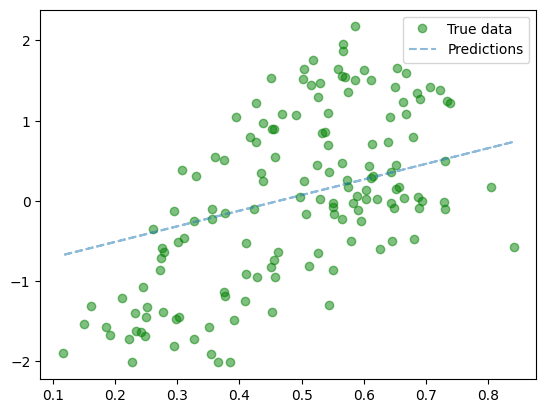

In [41]:
X_test_split.shape, Y_pred.shape, Y_test.shape

plt.clf()
plt.plot(X_test_split, Y_test, 'go', label='True data', alpha=0.5)
plt.plot(X_test_split, Y_pred, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()


## Evaluate the quality of the training (Generate Evaluation Metrics)

In [42]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))


Mean Absolute Error: 0.767187256227059
Mean Squared Error: 0.8296297772558702
Root Mean Squared Error: 0.9108401491238022
